<div style="text-align:center"><img src="https://www.dropbox.com/s/roovx0dx8mpm4ep/ECE4076_banner.png?dl=1"></div>



<h1 align="center"> ECE4076/5176 - Week 7 </h1>
<h1 align="center"> Gaussian Mixture Model (GMM) </h1>



You need to have the following packages to work with this notebook
- [numpy](https://anaconda.org/anaconda/numpy)
- [matplotlib](https://anaconda.org/conda-forge/matplotlib)
- [sklearn](https://scikit-learn.org/stable/install.html)
- [torch](https://pytorch.org/get-started/locally/)
- [torchvision](https://pytorch.org/get-started/locally/)

Use Anaconda navigator to install them in your environment or use pip  for installation. As an example, for sklearn package run the following (Mac/Windows)    

<code>!pip install -U scikit-learn</code>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from utils_GMM import plot_gmm, plot_kmeans

import torchvision


np.random.seed(seed=123)


## Generating some synthetic data.

We use [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) from [scikit-learn](https://scikit-learn.org/stable/index.html) to generate our data. The method <font color='LimeGreen'>make_blobs</font> creates isotropic Gaussian blobs for clustering. We start with a simple case with two blobs, located at $\boldsymbol{\mu}_1 = \begin{pmatrix} -2\\0 \end{pmatrix}$   and $\boldsymbol{\mu}_2 = \begin{pmatrix} 2\\0 \end{pmatrix}$. We consider each blob to have a small variance (here $\mathrm{std}=0.25$), hence clusters are compact to a great degree. We sample 250 data points from each blob. Study the snippet below.

In [ ]:
X1, _ = make_blobs(n_samples=[250,250], centers=np.array([[-2,0],[2,0]]), cluster_std=[0.25,0.25])
plt.scatter(X1[:,0],X1[:,1],edgecolor="black", s=100, color="cyan")
# set axes range
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.tight_layout()
plt.show()

Now we are going to use GMM from the [scikit-learn](https://scikit-learn.org/stable/index.html) to cluster our synthetic data. We will use the [fit](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.fit) method to fit a GMM to our data. Study the snippet below.

In [ ]:
gmm1 = GaussianMixture(n_components=2).fit(X1)

## Activity 1

All information about the fitted GMM can be accessed via its <font color='LimeGreen'>weights_</font> , 
<font color='LimeGreen'>means_</font> , and  <font color='LimeGreen'>covariances_</font>
 attributes. Before checking these values, answer the following questions
- what do you expect to see as the weights of the components in the mixture? Recall that for a GMM $\sum_{i=1}^K w_i =1$.
- what do you expect to see as the centers of the Gaussian components in the mixture?
- what do you expect to see as the covariance matrix of the Gaussian components?


<font color='orange'>  
Now print out the above attributes. Does the result make sense
</font>
<font color='red', size=4> ? </font>


## Activity 2

hmm, this looks amazing. The GMM knew nothing about how we created our data, yet it recovered the underlying structure nicely. Let's make things a bit more interesting. How about creating a blob with 450 samples and higher dispersion (i.e., std), while having a small blob with only 50 samples and a low dispersion. 


<font color='orange'>  
Use make_blobs to create such data, plot the data and then fit a GMM to it.
</font>


The accompanying <font color='LimeGreen'>utils_GMM.py</font> has a function called <font color='LimeGreen'>plot_gmm</font> to plot a learned GMM. We will use it below to plot the GMM learned for the second activity. Note that the GMM model in  [scikit-learn](https://scikit-learn.org/stable/index.html) has a method called [predict](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.predict) that you can use to identify the component with maximum likelihood given your data. In a sense, the predict method does a hard-clustering based on the weights and likelihood of Gaussian components. The <font color='LimeGreen'>plot_gmm</font> function use this method to plot.

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plot_gmm(gmm2, X2, ax=ax1)
plt.tight_layout()
plt.show()

## Activity 3

In the $\mathbb{R}^2$ plane, there are points that are more similar to the first component of our GMM and there are points that are more similar to teh second component. Maybe there are some points where the similarity to both components match and hence ambiguity arises. The method [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.predict_proba) can be used to obtain the likelihood of a sample with respect to each componenet as 
\begin{align}
    \gamma_k(\boldsymbol{x}) = \frac{w_k \mathcal{N}(\boldsymbol{x}\vert \boldsymbol{\mu}_k, \Sigma_k)}
    {\sum_{j=1}^K\limits w_j \mathcal{N}(\boldsymbol{x}\vert \boldsymbol{\mu}_j, \Sigma_j)}
\end{align}


- Use meshgrid and traverse $[-6,6] \times [-6,6]$ with an appropriate step and visualize the response of each component to the points in $[-6,6] \times [-6,6]$  
- Is the result expected? Can you explain what you see?

In [ ]:
region_var = np.linspace(-6,6,500)
var_x, var_y = np.meshgrid(region_var,region_var)
plt_X = np.vstack([var_x.flatten(),var_y.flatten()]).T

##### ADD YOUR CODE BELOW BY UNCOMMENTING THE LINE #####

# resp_plt_X = 

########################################################

# below we plot the probabilities wrt one of the components only (that serves our purpose)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(var_x, var_y, c=resp_plt_X[:,0].reshape(var_x.shape))
ax1.scatter(X2[:,0], X2[:,1], edgecolor="black", s=100, color="cyan")
# we can use the contour function to obtain the decision boundary as follows 
ax2.contour(var_x, var_y, resp_plt_X[:,0].reshape(var_x.shape)-resp_plt_X[:,1].reshape(var_x.shape), levels=[0])
plt.tight_layout()
plt.show()

## Activity 4

Let's make a more complicated case. We first generate 4 compact clusters and then multiply the sampled points with a random matrix $\boldsymbol{A}$. You may ask why, let's see what will happen doing this. 

In [ ]:
X3_0 = np.empty((0,2))
X3 = np.empty((0,2))
for tmp in range(3): 
    dummy_var, _ = make_blobs(n_samples=100, centers=1, cluster_std=0.75, center_box=(-5,5))

    A = np.random.randn(2,2)

    dummy_var2 = np.matmul(dummy_var,A)

    X3_0 = np.append(X3_0,dummy_var,axis=0)
    X3 = np.append(X3,dummy_var2,axis=0)
    


# below we plot the our data before and after applying random linear projections
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(X3_0[:,0], X3_0[:,1], edgecolor="black", s=100, color="cyan")
ax2.scatter(X3[:,0], X3[:,1], edgecolor="black", s=100, color="cyan")
plt.tight_layout()
plt.show()

### - Now apply GMM to X3 and plot the result. Are you still happy with the result?
- do you think K-Means algorithm can do a good job with this data? To test K-Means, use the function plot_kmeans from the <font color='LimeGreen'>utils_GMM.py</font>. You need to use this function as <font color='MediumSlateBlue'>plot_kmeans(X3, n_clusters=3)</font>.

## Activity 5 

Now we are going to push the limits. We will use the so-called two-moon dataset below. Use the knowledge you have gained and see if there is a way to cluster data where each arc can be grouped to a cluster or a set of clusters. 

In [ ]:
X4, _ = make_moons(200, noise=.05, random_state=0)
plt.scatter(X4[:, 0], X4[:, 1], edgecolor="black", s=100, color="cyan")
plt.tight_layout()
plt.show()

You can continue and study what will happen 
if you increase the number of components in the GMM.

## So what - what does this mean for images?

Let's build a generative model using the fashion mnist dataset. To do this we are going to introduce Principal Component Analysis, a nice application of singular value decomposition techniques we have seen earlier in the unit.

In [2]:
# Dowload some data and turn into numpy arrays
data = torchvision.datasets.FashionMNIST('./data/',download=True)
images = np.array(data.data)
labels = np.array(data.targets)

Fashion mnist comprises 60000 simple images of clothing, in 10 classes. It's a nice toy dataset for testing classifiers, but we will use it to build a simple generative model.

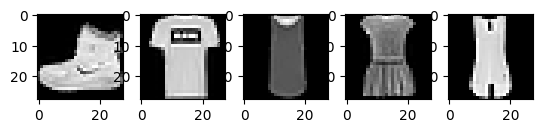

In [3]:
# Let's look at a random subset of images - always look at your data
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i,:,:],cmap='gray')
plt.show()

I don't have enough memory to work with the whole dataset at once, so will just use a subset of images from class 2. Principal component analysis finds a decomposition of images into a set of orthogonal vectors and coefficients, ordered in terms of their contribution to the original signal.  

In [4]:
#I don't have enough memory, so I will just used a subset of all the images from class 2
images = images[labels==2,:,:]
images = images/255.0

The method is simple, subtract the mean of your data, then turn it into one long vector, and compute the SVD. This technique was originally proposed for face recognition - a method known as [Eigenfaces](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf).

In [5]:
# Centre all our our images by subtracting the mean, and reshape into 1 long vector
Xm = np.mean(images,axis=0)

X = (images - Xm).reshape(images.shape[0],-1)

#Take the SVD of this matrix
U,S,V = np.linalg.svd(X)


In [6]:
# Lets look at the shape of these matrices
print(U.shape) #We have image number x image number - we'll call these basis functions
print(V.shape) #We have pixel number x pixel number - we'll call these loadings or coefficients
print(S.shape) #We have image number singular values

(6000, 6000)
(784, 784)
(784,)


Remember that the SVD decomposed a matrix into 2 orthogonal matrices, and a diagonal matrix of singular values S? The magnitude of these singular values tells us how much each of the vectors contributes to the original matrix.  We can exploit this to get a low dimensional approximation to the original images, by retaining only the 1st N vectors corresponding to the largest singular values.


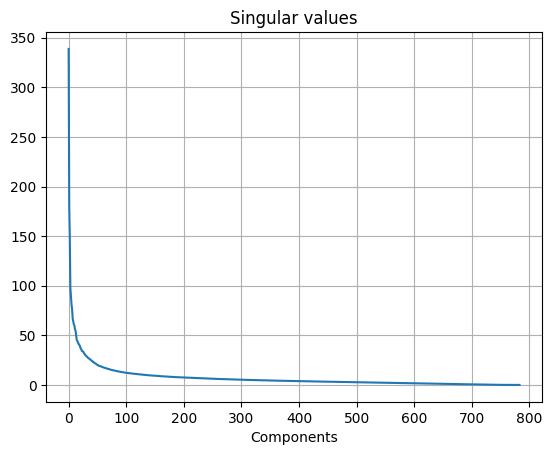

In [7]:
plt.plot(S)
plt.grid()
plt.title('Singular values')
plt.xlabel('Components')
plt.show()

To reconstruct our image using only a subset of components, we will use the following approach, taking only the first N basis functions, columns of U, and corresponding singular values and coefficients.

`Xrecon = U[:,0:N]@S[:N]@V[:N,:]`

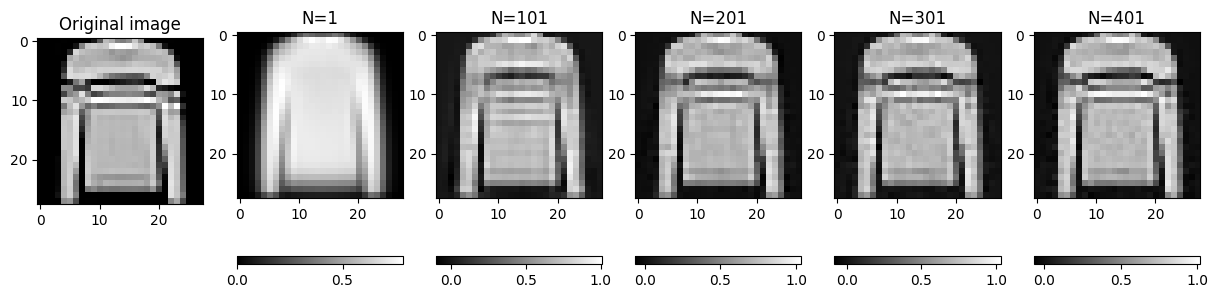

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,6,1)
plt.imshow(images[0,:,:],cmap='gray')
plt.title('Original image')

# Reconstruct image using increasing numbers of basis functions
for j,N in enumerate(np.arange(1,500,100)):
    Xrecon = U[0,0:N]@np.diag(S[:N])@V[:N,:]
    plt.subplot(1,6,j+2)
    plt.imshow(Xrecon.reshape(28,28) + Xm,cmap='gray')
    plt.title('N=%d'%N)
    plt.colorbar(orientation='horizontal')


plt.show()

This is super cool. Singular value decomposition does compression (or feature extraction). Our original image comprised 784=28*28 pixels, but this shows we can get something looking a lot like our original image using about 100 components. This corresponds to storing a 100x784 matrix $\hat{V}$, which is *image independent*, a 1x100 matrix of singular values, also *image independent*. The only image dependent information we kept was a 1x100 feature vector, the rows of U. So we have effectively compressed our image from 784 pixels to 100 d vector. We can also compress unseen image vectors $(I_v)$ by projecting an image into this space.

$$U_{new} = I_v{(\hat{S}\hat{V})}^{-1}$$

Intuitively, this makes sense, look at the curve above, 100 components is basically the *knee* of the curve, which like our method of choosing gaussian mixture components, seems a sensible trade-off between compression and reconstruction quality. 

Ok. Lets fit a Gaussian mixture model to these low dimensional vectors.







In [9]:
N = 100
Ncomps = 25 #  I am going to arbitrarily choose 25 components - you may want to consider reducing this for memory. 
gmm_mnist = GaussianMixture(n_components=Ncomps).fit(U[:,:N].reshape(U.shape[0],-1))

Lets reconstruct the means of the GMM - cool, these look like different styles of shirt

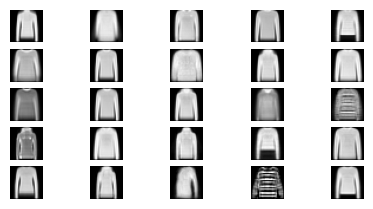

In [10]:
plt.figure(figsize=(5,5))
for j in range(Ncomps):
    plt.subplot(10,5,j+1)
    mu = gmm_mnist.means_[j]
    # Notice that when we reconstruct, I clip the image to remain within the original bounds
    im_recon = np.clip((mu@np.diag(S[:N])@V[:N,:]).reshape(28,28) + Xm,0,1) 
    plt.imshow(im_recon,cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace=None, hspace=None)
plt.show()

Lets draw some samples from these Gaussians. I will use a trick to sample from a multi dimensional Gaussian - cholesky decomposition. Recall that sampling from a one dimensional gaussian is

$$ x_s = \mu + \sqrt(\sigma^2) \epsilon , \epsilon \sim{\mathcal{N}(0,1)} $$

Cholesky decomposition factorises a positive definite real matrix  $A = LL^{T}$ - like a matrix square root. We can use this to sample from a multi dimensional Gaussian with full covariance matrix.

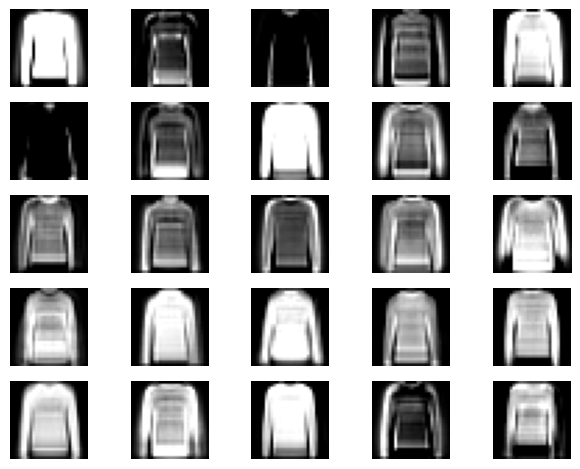

In [11]:
for j in range(25):
        idx = np.random.choice(Ncomps,1,p=gmm_mnist.weights_) #Sample a gaussian in proportion to the weights
        
        sample = gmm_mnist.means_[idx] + np.random.randn(1,N)@np.linalg.cholesky(gmm_mnist.covariances_[idx]) #Sample from the this gaussian
        
        plt.subplot(5,5,j+1)
        # Show vector
        im_recon = np.clip((sample@np.diag(S[:N])@V[:N,:]).reshape(28,28) + Xm,0,1)
        plt.imshow(im_recon,cmap='gray')
        plt.axis('off')
        
plt.tight_layout()
plt.show()

Nice, we have built 'generative AI'. Modern techniques don't work this way, but do share some similarities. 
* They typically generate from a lower-dimensional representation or feature set (often learned using a neural network)
* They often rely on gaussian mixture outputs [(mixture density networks)](https://publications.aston.ac.uk/id/eprint/373/1/NCRG_94_004.pdf) to provide a nice way of sampling (allegedly gpt4 does something like this).  

The ideas behind PCA are also very related to autoencoders. We will have a bonus notebook on these later.

## Activity 6

* Play around with the code above and observe the effects of reducing/ increasing the number of components used for dimension reduction and Gaussian mixture model fitting. What does this do to the quality of the images generated?
* Try expand the model to use multiple image classes. How does this affect the quality of the generated images?